In [1]:
# import packages for data analysis and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import library to remove warnings
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
# Retrive and read data
data = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')

In [3]:
data.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [5]:
# rename columns
data = data.rename(columns={'Provinsi': 'Province', 
                     'Tahun': 'Year', 
                     'Produksi':'Production', 
                     'Luas Panen': 'Harvested Area',
                     'Curah hujan': 'Precipitation', 
                     'Kelembapan': 'Humidity',
                     'Suhu rata-rata': 'Average Temperature'})

In [6]:
data.head()

,Province,Year,Production,Harvested Area,Precipitation,Humidity,Average Temperature
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


# Change the data type

In [7]:
# Change the data type in the 'Year' column to datetime with the format yyy
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [8]:
# check data type change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Province             224 non-null    object        
 1   Year                 224 non-null    datetime64[ns]
 2   Production           224 non-null    float64       
 3   Harvested Area       224 non-null    float64       
 4   Precipitation        224 non-null    float64       
 5   Humidity             224 non-null    float64       
 6   Average Temperature  224 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 12.4+ KB


# Check Null Value

In [9]:
# Check if there is a null value in each variable
data.isnull().sum()

Province               0
Year                   0
Production             0
Harvested Area         0
Precipitation          0
Humidity               0
Average Temperature    0
dtype: int64

In [10]:
data.shape

(224, 7)

In [11]:
data.dtypes

Province                       object
Year                   datetime64[ns]
Production                    float64
Harvested Area                float64
Precipitation                 float64
Humidity                      float64
Average Temperature           float64
dtype: object

In [12]:
print(data.memory_usage(deep=True))
print(f"Total memory usage: {data.memory_usage(deep=True).sum()} bytes")

Index                    132
Province               14784
Year                    1792
Production              1792
Harvested Area          1792
Precipitation           1792
Humidity                1792
Average Temperature     1792
dtype: int64
Total memory usage: 25668 bytes


# Check the unique value in the 'Province' column

In [13]:
# Number of different values in the 'Province' column
data['Province'].nunique()

8

In [14]:
# The amount of data for each different value in the 'Province' column
data['Province'].value_counts()

Province
Aceh                28
Sumatera Utara      28
Sumatera Barat      28
Riau                28
Jambi               28
Sumatera Selatan    28
Bengkulu            28
Lampung             28
Name: count, dtype: int64

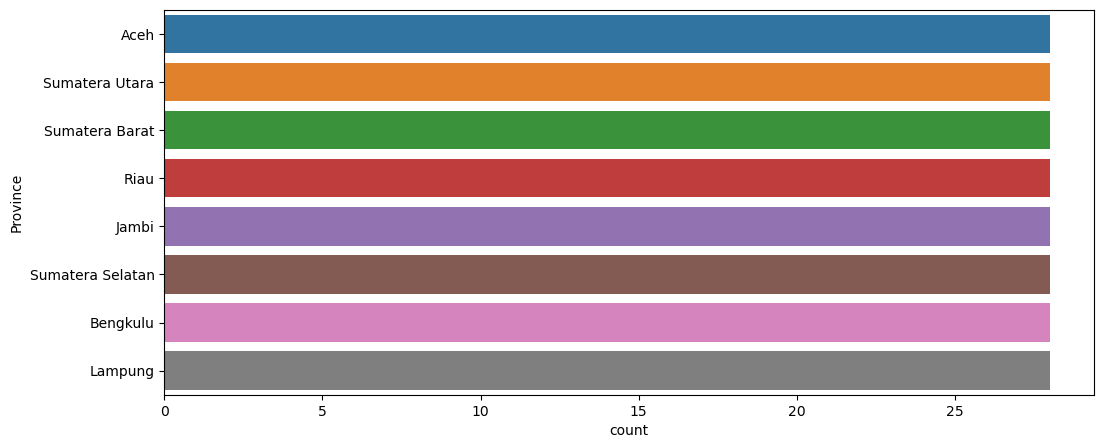

In [15]:
# Create a data visualization for data['Province]
plt.figure(figsize=(12,5))
sns.countplot(data=data, y='Province')
plt.show()

# Add a feature called 'productivity'. This feature is derived from the quotient between Production and Harvested Area.

In [16]:
data['Productivity'] = data['Production'] / data['Harvested Area']
data.head(5)

,Province,Year,Production,Harvested Area,Precipitation,Humidity,Average Temperature,Productivity
0,Aceh,1993-01-01,1329536.0,323589.0,1627.0,82.00,26.06,4.108718
1,Aceh,1994-01-01,1299699.0,329041.0,1521.0,82.12,26.92,3.949961
2,Aceh,1995-01-01,1382905.0,339253.0,1476.0,82.72,26.27,4.076324
3,Aceh,1996-01-01,1419128.0,348223.0,1557.0,83.00,26.08,4.075343
4,Aceh,1997-01-01,1368074.0,337561.0,1339.0,82.46,26.31,4.052820


In [17]:
data.describe()

,Year,Production,Harvested Area,Precipitation,Humidity,Average Temperature,Productivity
count,224,2.240000e+02,224.000000,224.000000,224.000000,224.000000,224.000000
mean,2006-07-02 12:00:00,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964,4.370405
min,1993-01-01 00:00:00,4.293800e+04,63142.040000,222.500000,54.200000,22.190000,0.315310
25%,1999-10-01 18:00:00,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500,3.661188
50%,2006-07-02 12:00:00,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000,4.142801
75%,2013-04-02 06:00:00,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000,4.659973
max,2020-01-01 00:00:00,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000,12.658375
std,NaN,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041,1.478052


In [18]:
# Calculating skewness and kurtosis
print('The Harvested Area Skewness: ', data['Harvested Area'].skew())
print('Harvested Area Kurtosis: ',data['Harvested Area'].kurt())

The Harvested Area Skewness:  0.4288979897840768
Harvested Area Kurtosis:  -0.9579065265837765


In [19]:
# Me# Calculating skewness and kurtosis
print('The Production Skewness: ', data['Production'].skew())
print('Production Kurtosis: ',data['Production'].kurt())

The Production Skewness:  0.5490526369512856
Production Kurtosis:  -0.6041902722673309


In [20]:
# Calculating skewness and kurtosis
print('The Precipitation Skewness: ', data['Precipitation'].skew())
print('Precipitation Kurtosis: ',data['Precipitation'].kurt())

The Precipitation Skewness:  0.6319267437545197
Precipitation Kurtosis:  0.28114886671051487


In [21]:
# Calculating skewness and kurtosis
print('The Humidity Skewness: ', data['Humidity'].skew())
print('Humidity Kurtosis: ',data['Humidity'].kurt())

The Humidity Skewness:  -1.487424903514194
Humidity Kurtosis:  3.7226532125190808


In [22]:
# Calculating skewness and kurtosis
print('The Productivity Skewness: ', data['Productivity'].skew())
print('Productivity Kurtosis: ',data['Productivity'].kurt())

The Productivity Skewness:  2.6789053823142472
Productivity Kurtosis:  10.766010423393734


In [23]:
# Calculating skewness and kurtosis
print('The Average Temperature Skewness: ', data['Average Temperature'].skew())
print('Average Temperature Kurtosis: ',data['Average Temperature'].kurt())

The Average Temperature Skewness:  0.06150777334504994
Average Temperature Kurtosis:  1.889364934833634


# Create a pairplot visualization to display the relationship between variables in one view

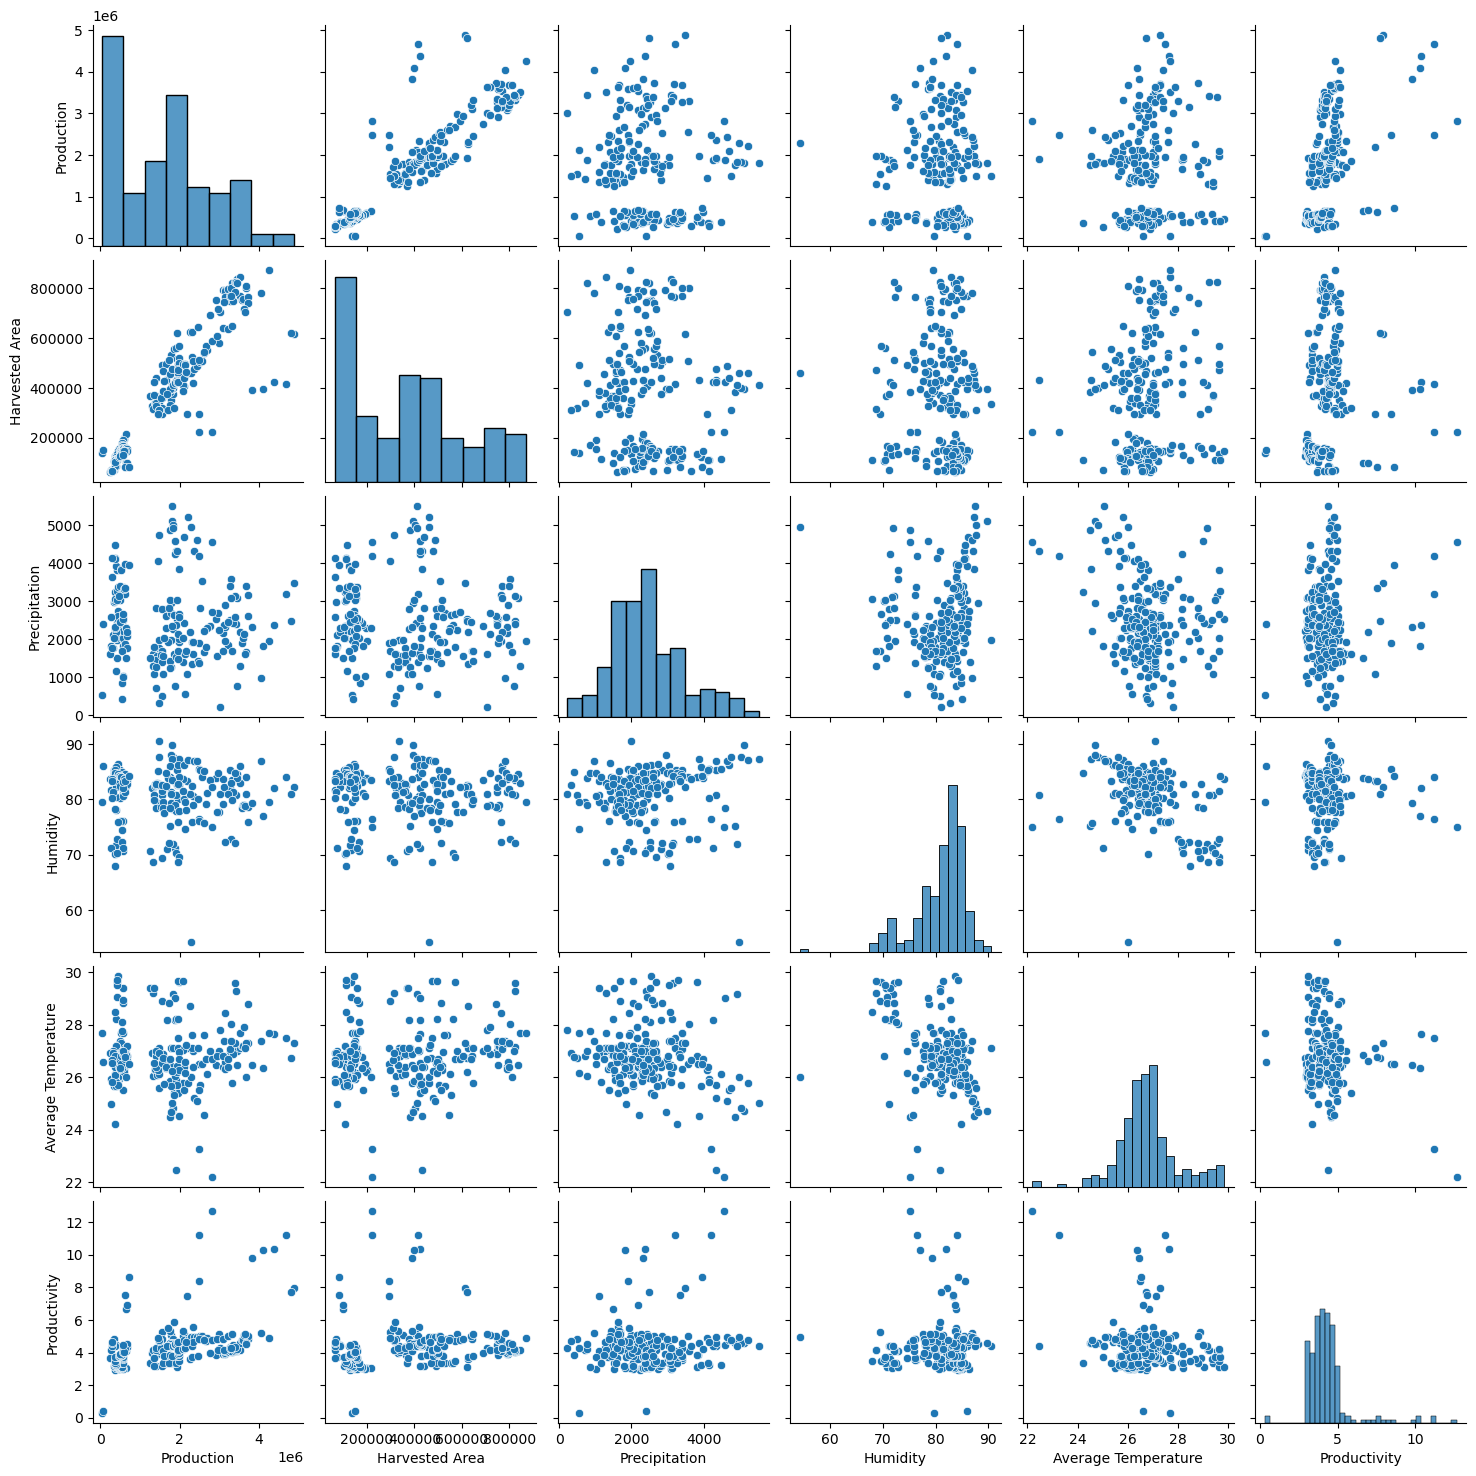

In [24]:
sns.pairplot(data)

# Standardization numerical data

In [25]:
# Separating numeric and categorical data
data_num = data.select_dtypes(include=['int64','float64'])
data_cat = data.select_dtypes(exclude='object')

In [26]:
# Separating numeric and categorical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
data_n = scaler.fit_transform(data_num)
data_num = pd.DataFrame(data_n, columns=data_num.columns)

In [28]:
data_num.head(3)

,Production,Harvested Area,Precipitation,Humidity,Average Temperature,Productivity
0,-0.302181,-0.218580,-0.801707,0.215970,-0.621220,-0.177445
1,-0.327929,-0.195103,-0.904653,0.240622,0.098827,-0.285096
2,-0.256125,-0.151130,-0.948356,0.363882,-0.445395,-0.199411


# Check out the outliers

<Axes: >

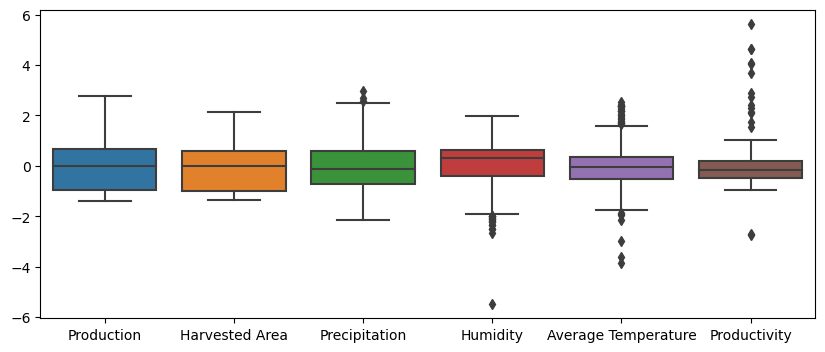

In [91]:
# check outliers untuk data yang berkorelasi positif
plt.figure(figsize=(10,4))
sns.boxplot(data=data_num[['Production','Harvested Area','Precipitation', 'Humidity','Average Temperature', 'Productivity']])

# Check out on The Data Distribution

<Figure size 1200x800 with 0 Axes>

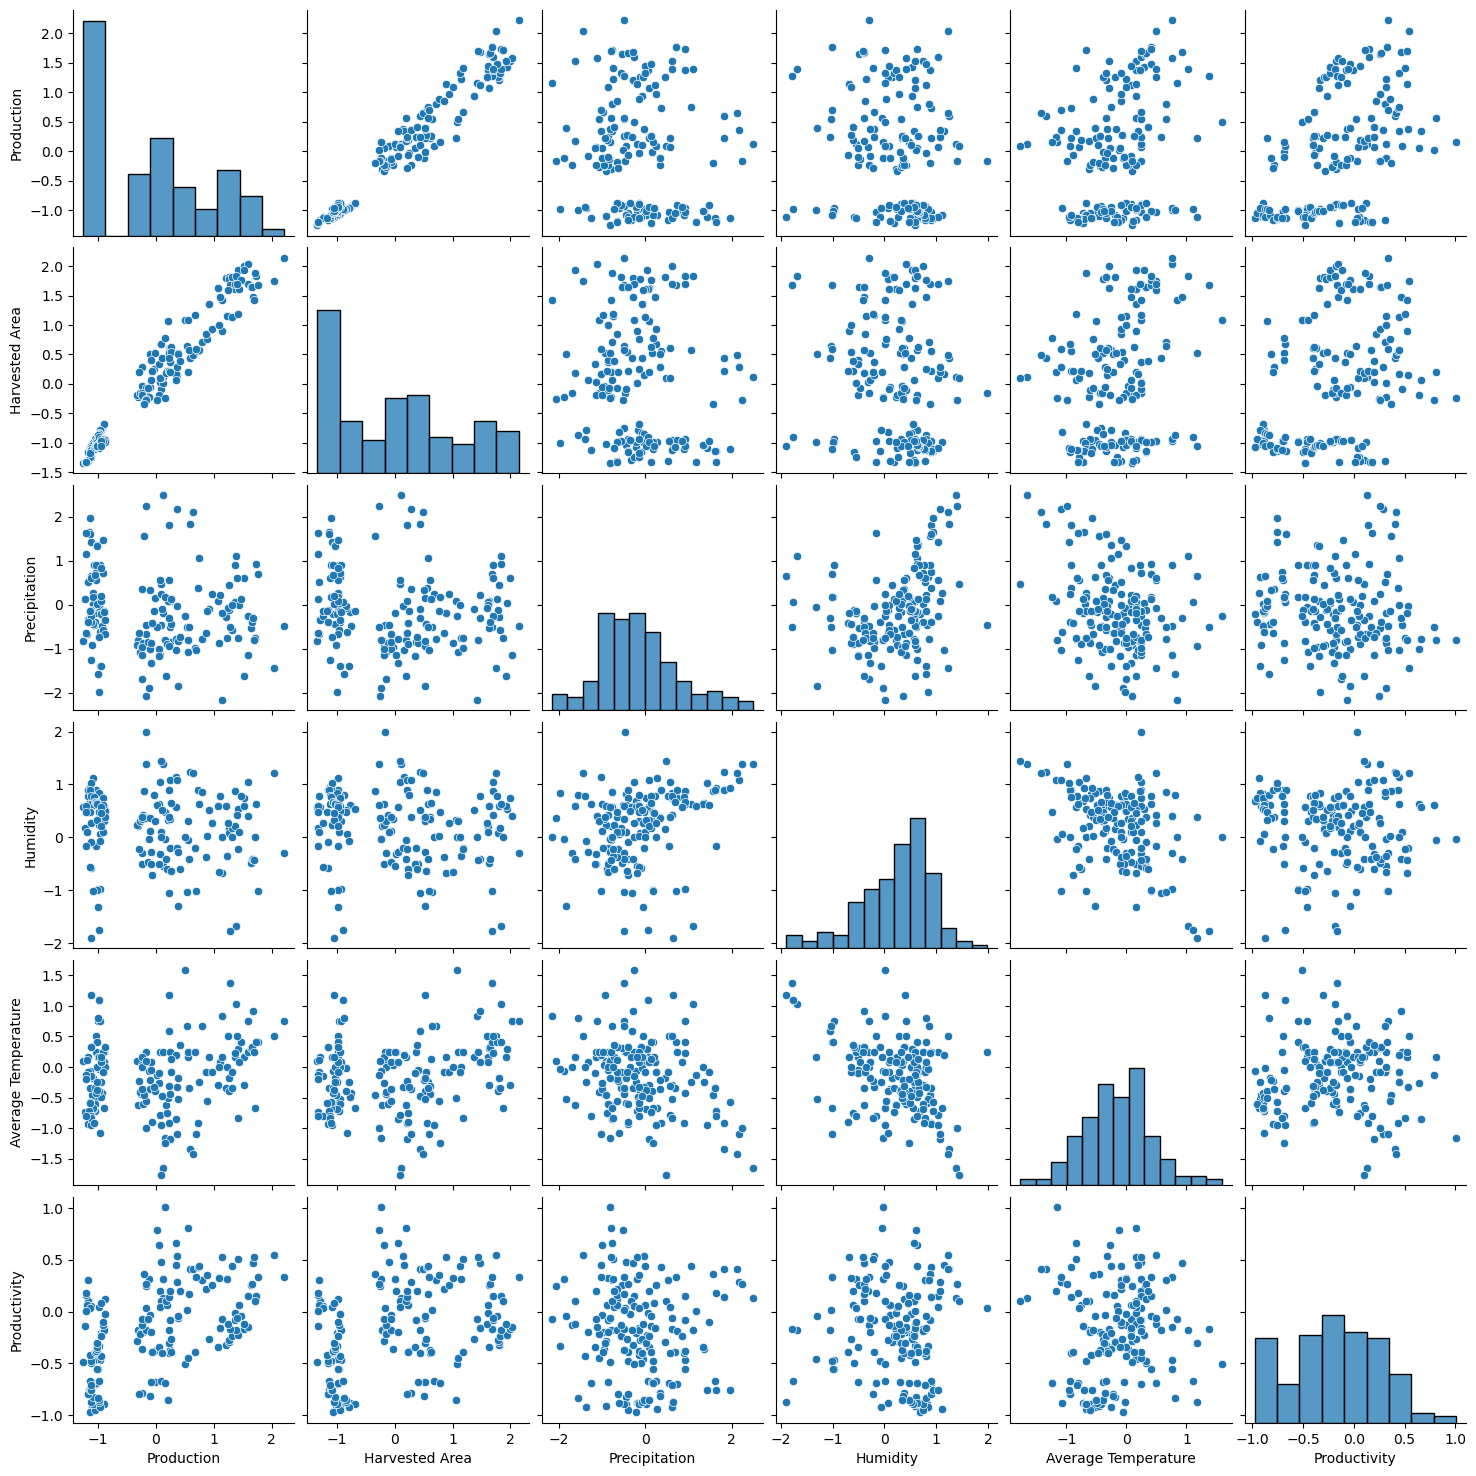

In [92]:
# Check the change in the relationship plot between variables after the data is normalized 
plt.figure(figsize=(12,8))
sns.pairplot(data_num_clean)
plt.savefig('Pairplot.png')

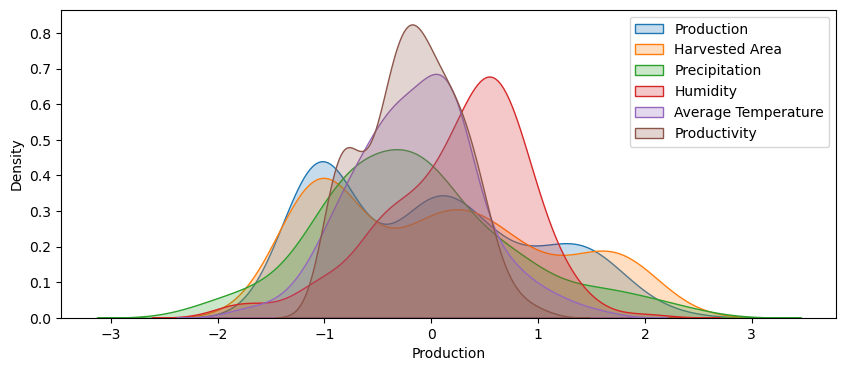

In [89]:
plt.figure(figsize=(10,4))
sns.kdeplot(data_num_clean['Production'], shade=True);
sns.kdeplot(data_num_clean['Harvested Area'], shade=True);
sns.kdeplot(data_num_clean['Precipitation'], shade=True);
sns.kdeplot(data_num_clean['Humidity'], shade=True);
sns.kdeplot(data_num_clean['Average Temperature'], shade=True);
sns.kdeplot(data_num_clean['Productivity'], shade=True);
plt.legend(['Production', 'Harvested Area', 'Precipitation', 'Humidity', 'Average Temperature', 'Productivity']);
plt.show()

# Handling Outliers

In [32]:
# remove outliers in data_num using IQR
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
data_num_clean = data_num[~((data_num < (Q1 - 1.5 * IQR)) |(data_num > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

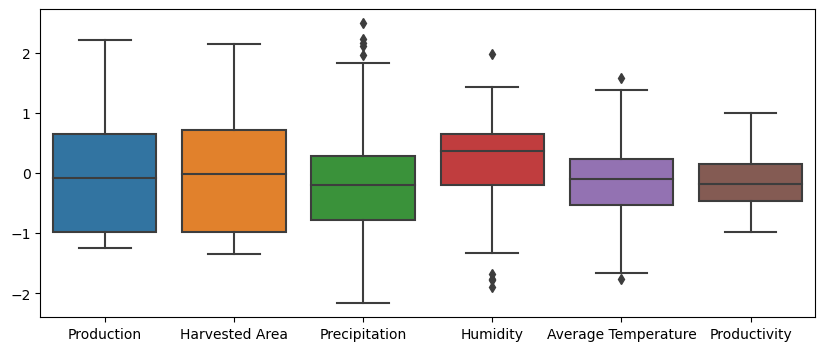

In [33]:
# Data visualization with boxplot after handling outliers
plt.figure(figsize=(10,4))
sns.boxplot(data=data_num_clean[['Production', 'Harvested Area', 'Precipitation', 'Humidity', 'Average Temperature', 'Productivity']])

In [66]:
data.describe(include='object')

,Province
count,224
unique,8
top,Aceh
freq,28


In [65]:
pivot_table = pd.pivot_table(data, 
                             values=['Production', 'Harvested Area', 'Productivity', 'Precipitation', 'Humidity', 'Average Temperature'], 
                             index=['Province'], 
                             aggfunc='mean')

pivot_table.reset_index()

,Province,Average Temperature,Harvested Area,Humidity,Precipitation,Production,Productivity
0,Aceh,27.032143,347109.523214,80.500357,1485.753571,1.618737e+06,4.712601
1,Bengkulu,26.577143,111777.546429,82.443929,3228.017857,4.449648e+05,4.078857
2,Jambi,26.965000,150722.131071,81.842143,1998.317857,5.528638e+05,3.837238
3,Lampung,26.783571,518478.621429,79.073929,1925.300000,2.444068e+06,4.766108
4,Riau,27.015000,126071.401786,80.316429,2464.996429,4.074645e+05,3.320930
5,Sumatera Barat,25.651071,402614.768571,81.486071,3878.747500,1.990396e+06,5.168202
6,Sumatera Selatan,27.078571,623007.246071,80.855714,2429.871429,2.648643e+06,4.182729
7,Sumatera Utara,27.313214,715018.496786,81.071071,2208.921429,3.330471e+06,4.896575


# Look at the correlation between variables with pearson and spearman

In [34]:
# Pearson Correlation
data_num_clean.corr(method='pearson')['Production'].sort_values(ascending=False)

Production             1.000000
Harvested Area         0.976264
Productivity           0.536277
Average Temperature    0.217326
Precipitation         -0.134286
Humidity              -0.147434
Name: Production, dtype: float64

In [35]:
# Spearman Correlation
data_num_clean.corr(method='spearman')['Production'].sort_values(ascending=False)

Production             1.000000
Harvested Area         0.967695
Productivity           0.540971
Average Temperature    0.252915
Precipitation         -0.146703
Humidity              -0.197355
Name: Production, dtype: float64

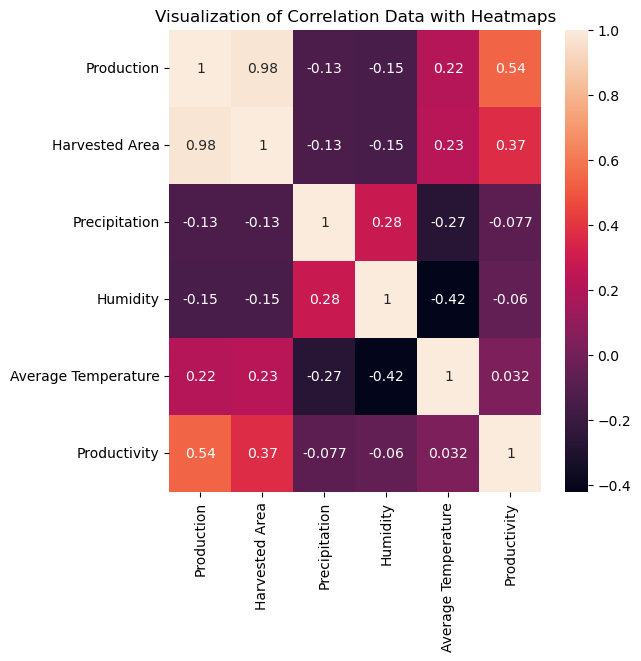

In [36]:
# showing data correlation visualization with heatmaps
plt.figure(figsize=(6,6))
sns.heatmap(data_num_clean.corr(), annot=True)
plt.title('Visualization of Correlation Data with Heatmaps')
plt.savefig('Visualization of Correlation Data with Heatmaps.png')

# Uji Z-Score

# Melakukan Uji Chi-Square

In [88]:
# perform a chi-square test using the Production and Harvested Area columns in the 'data' dataframe
from scipy.stats import chi2
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(data[['Production','Harvested Area','Productivity']])

In [38]:
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi-Square Statistic: 4509887.431775678
p-value: 0.0
Degrees of Freedom: 446


In [39]:
print("Expected Frequencies:")
print(expected)

Expected Frequencies:
[[1.35184410e+06 3.01281494e+05 3.51735623e+00]
 [1.33190317e+06 2.96837318e+05 3.46547202e+00]
 [1.40829571e+06 3.13862699e+05 3.66423740e+00]
 [1.44525223e+06 3.22099088e+05 3.76039436e+00]
 [1.39478403e+06 3.10851391e+05 3.62908142e+00]
 [1.44780423e+06 3.22667845e+05 3.76703440e+00]
 [1.50345797e+06 3.35071229e+05 3.91183958e+00]
 [1.49131056e+06 3.32363973e+05 3.88023331e+00]
 [1.50687872e+06 3.35833602e+05 3.92074001e+00]
 [1.33235801e+06 2.96938689e+05 3.46665549e+00]
 [1.32005353e+06 2.94196425e+05 3.43464052e+00]
 [1.40793228e+06 3.13781701e+05 3.66329177e+00]
 [1.43068984e+06 3.18853612e+05 3.72250457e+00]
 [1.53153842e+06 3.41329436e+05 3.98490196e+00]
 [1.56809790e+06 3.49477339e+05 4.08002588e+00]
 [1.41585023e+06 3.15546351e+05 3.68389344e+00]
 [1.54779234e+06 3.44951899e+05 4.02719295e+00]
 [1.75081955e+06 3.90199973e+05 4.55544841e+00]
 [1.76114655e+06 3.92501522e+05 4.58231819e+00]
 [1.61112846e+06 3.59067432e+05 4.19198687e+00]
 [2.24900060e+06 5

In [59]:
expected.shape

(224, 3)

In [40]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0), there is a significant relationship between Production and Harvested Area and also Productivity")
else:
    print("Failed to reject the null hypothesis (H0), there is no significant relationship between Production and Harvested Area and also Productivity.")

Reject the null hypothesis (H0), there is a significant relationship between Production and Harvested Area and also Productivity


# Build Model Linear Regression

In [41]:
# Importing linear regression libraries from sklearn and train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
# Feature selection
X = data_num_clean[['Harvested Area', 'Productivity']]
y = data_num_clean['Production']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Linear Regression dengan X_train dan y_train

In [77]:
# building model linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
# calculate coefficient and intercept
print('coefisien:', model.coef_)
print('intercept:', model.intercept_)

coefisien: [0.82480842 0.41614155]
intercept: -0.0007153981641874058


In [79]:
# calculate mse for evaluation of linear regression results
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print('mse:', mse)

mse: 0.010002842946512009


In [80]:
# calculate RMSE for linear regression result evaluation
rmse = np.sqrt(mse)
print('rmse:', rmse)

rmse: 0.10001421372241052


In [81]:
# calculate the R square value (Coeficient Determination)
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred)
print('r2_square:', r2)

r2_square: 0.9880151042502052


Text(0.5, 1.0, 'Scatter Plot of Harvested Area and Productvity vs Production')

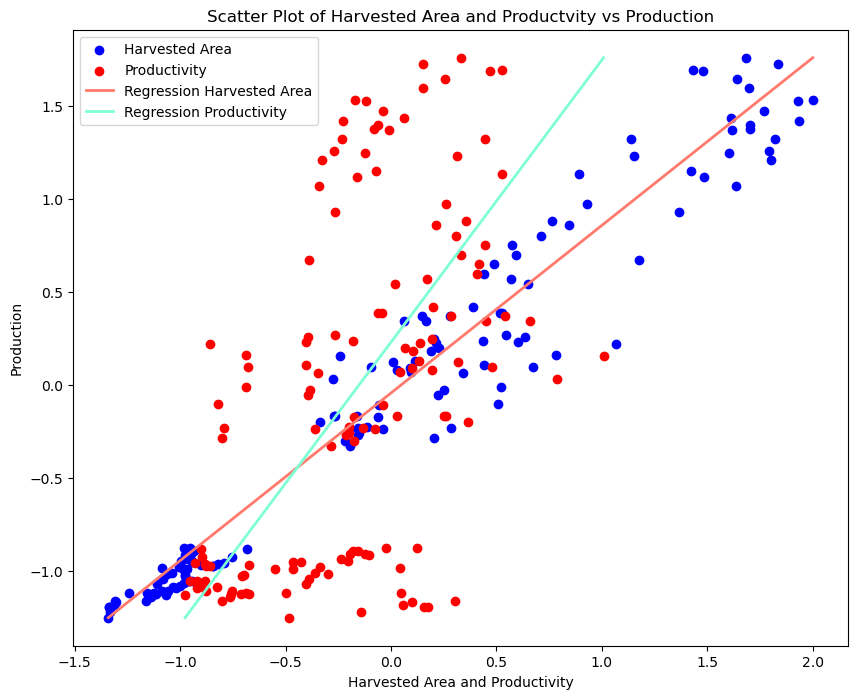

In [82]:
# Visualization of linear regression data with scatter plot
plt.figure(figsize=(10,8))
plt.scatter(X_train['Harvested Area'], y_train, color='blue', label='Harvested Area')
plt.scatter(X_train['Productivity'], y_train, color='red', label='Productivity')
plt.plot([min(X_train['Harvested Area']), max(X_train['Harvested Area'])], [min(y_train), max(y_train)], color='#FF796C', linewidth=2, label='Regression Harvested Area')
plt.plot([min(X_train['Productivity']), max(X_train['Productivity'])], [min(y_train), max(y_train)], color='aquamarine', linewidth=2, label='Regression Productivity')
plt.xlabel('Harvested Area and Productivity')
plt.ylabel('Production')
plt.legend()
plt.title('Scatter Plot of Harvested Area and Productvity vs Production')

## Model Linear Regression dengan X_test dan y_test

In [50]:
# Build model
model_test = LinearRegression()
model_test.fit(X_test, y_test)

LinearRegression()

In [51]:
# calculate coefisien_test and intercept_test
print('coefisien_test:', model_test.coef_)
print('intercept_test:', model_test.intercept_)

coefisien_test: [0.84799426 0.25420047]
intercept_test: -0.044337247241911876


In [52]:
# claculate MSE test
y_pred_test = model_test.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('mse_test:', mse_test)

mse_test: 0.019112646966540588


In [53]:
# calculate rmse test
rmse_test = np.sqrt(mse_test)
print('rmse_test:', rmse_test)

rmse_test: 0.13824849715834378


In [54]:
# calculate r2_score test
r2_test = r2_score(y_test, y_pred_test)
print('r2_test:', r2_test)

r2_test: 0.9709720398347595


Text(0.5, 1.0, 'Scatter Plot of Harvested Area and Productvity vs Production')

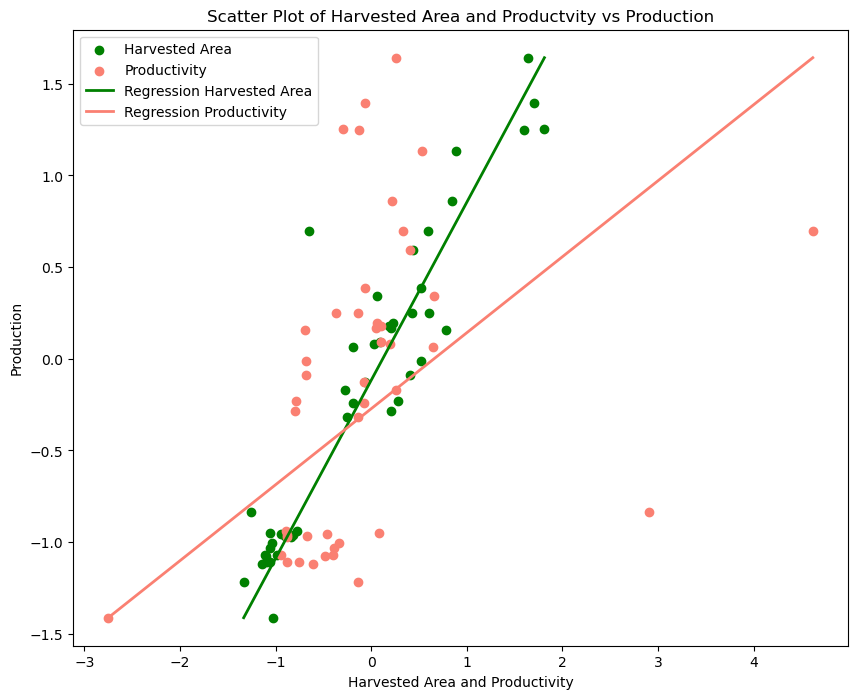

In [55]:
# Visualization of linear regression results from X_test and y_test
plt.figure(figsize=(10,8))
plt.scatter(X_test['Harvested Area'], y_test, color='green', label='Harvested Area')
plt.scatter(X_test['Productivity'], y_test, color='salmon',label='Productivity')
plt.plot([min(X_test['Harvested Area']), max(X_test['Harvested Area'])], [min(y_test), max(y_test)], color='green', linewidth=2, label='Regression Harvested Area')
plt.plot([min(X_test['Productivity']), max(X_test['Productivity'])], [min(y_test), max(y_test)], color='salmon', linewidth=2, label='Regression Productivity')
plt.xlabel('Harvested Area and Productivity')
plt.ylabel('Production')
plt.legend()
plt.title('Scatter Plot of Harvested Area and Productvity vs Production')

# Visualisasi Data Lienar Regression

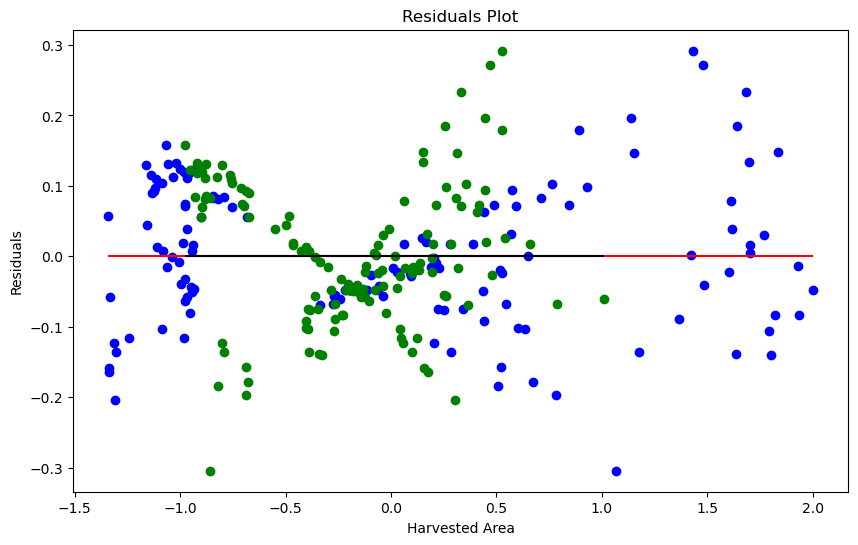

In [85]:
# Plot residuals
residuals = y_train - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Harvested Area'], residuals, color='blue')
plt.scatter(X_train['Productivity'], residuals, color='green')
plt.hlines(y=0, xmin=X_train['Harvested Area'].min(), xmax=X_train['Harvested Area'].max(), color='red')
plt.hlines(y=0, xmin=X_train['Productivity'].min(), xmax=X_train['Productivity'].max(), color='Black')
plt.title('Residuals Plot')
plt.xlabel('Harvested Area')
plt.ylabel('Residuals')
plt.show()

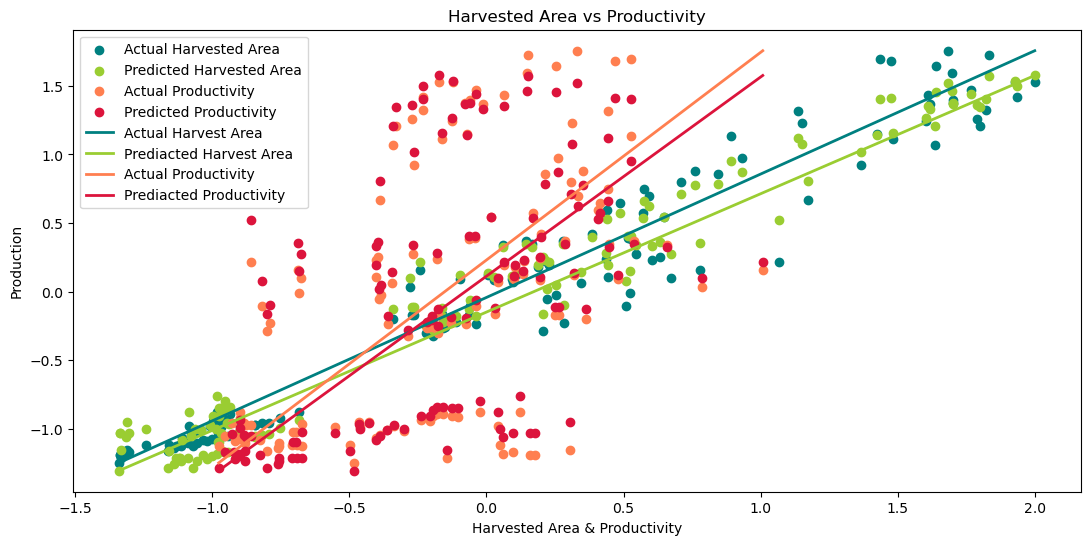

In [86]:
# Plot of original and predicted data
plt.figure(figsize=(13, 6))
plt.scatter(X_train['Harvested Area'], y_train, color='teal', label='Actual Harvested Area')
plt.scatter(X_train['Harvested Area'], y_pred, color='yellowgreen', label='Predicted Harvested Area')
plt.scatter(X_train['Productivity'], y_train, color='coral', label='Actual Productivity')
plt.scatter(X_train['Productivity'], y_pred, color='crimson', label='Predicted Productivity')
plt.plot([min(X_train['Harvested Area']), max(X_train['Harvested Area'])], [min(y_train), max(y_train)], color='teal', linewidth=2, label='Actual Harvest Area')
plt.plot([min(X_train['Harvested Area']), max(X_train['Harvested Area'])], [min(y_pred), max(y_pred)], color='yellowgreen', linewidth=2, label='Prediacted Harvest Area')
plt.plot([min(X_train['Productivity']), max(X_train['Productivity'])], [min(y_train), max(y_train)], color='coral', linewidth=2, label='Actual Productivity')
plt.plot([min(X_train['Productivity']), max(X_train['Productivity'])], [min(y_pred), max(y_pred)], color='crimson', linewidth=2, label='Prediacted Productivity')
plt.title('Harvested Area vs Productivity')
plt.xlabel('Harvested Area & Productivity')
plt.ylabel('Production')
plt.legend()
plt.show()

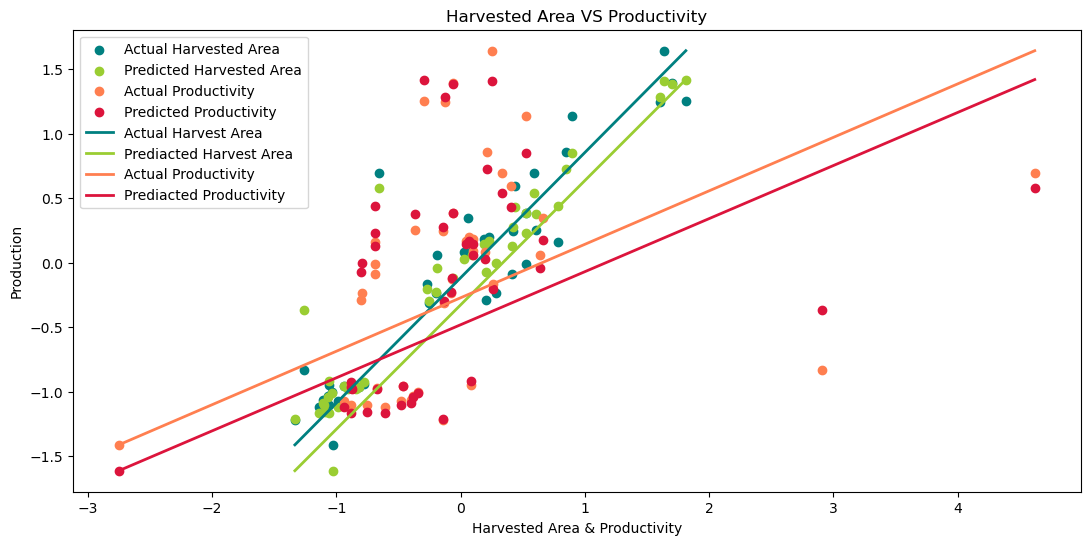

In [58]:
# Plot of original and predicted data
plt.figure(figsize=(13, 6))
plt.scatter(X_test['Harvested Area'], y_test, color='teal', label='Actual Harvested Area')
plt.scatter(X_test['Harvested Area'], y_pred_test, color='yellowgreen', label='Predicted Harvested Area')
plt.scatter(X_test['Productivity'], y_test, color='coral', label='Actual Productivity')
plt.scatter(X_test['Productivity'], y_pred_test, color='crimson', label='Predicted Productivity')
plt.plot([min(X_test['Harvested Area']), max(X_test['Harvested Area'])], [min(y_test), max(y_test)], color='teal', linewidth=2, label='Actual Harvest Area')
plt.plot([min(X_test['Harvested Area']), max(X_test['Harvested Area'])], [min(y_pred_test), max(y_pred_test)], color='yellowgreen', linewidth=2, label='Prediacted Harvest Area')
plt.plot([min(X_test['Productivity']), max(X_test['Productivity'])], [min(y_test), max(y_test)], color='coral', linewidth=2, label='Actual Productivity')
plt.plot([min(X_test['Productivity']), max(X_test['Productivity'])], [min(y_pred_test), max(y_pred_test)], color='crimson', linewidth=2, label='Prediacted Productivity')
plt.title('Harvested Area VS Productivity')
plt.xlabel('Harvested Area & Productivity')
plt.ylabel('Production')
plt.legend()
plt.show()